## 决策树 

优点：

- 易于理解和解释，树可以被可视化。

- 需要很少的数据准备，其他算法通常需要数据规范化(创建虚拟变量、删除缺失值)。但需注意，这个`模块不支持缺失值，需提前处理好缺失值`。

- 使用树的成本（即预测数据）与用于训练树的数据量成对数关系

- 能够处理数值和类别数据，但`scikit-learn的实现暂时不支持类别变量`

- 能够处理多输出问题

- 使用白盒模型。如果一个给定的情况在模型中是可以观察到的，那么对该情况的解释就很容易用布尔逻辑来解释


缺点：

- 决策树可以创建过于复杂的树，不能很好地概括数据，这就`过拟合`了。处理过拟合，比如修剪、设置叶子节点所需的最小样本数或设置树的最大深度等机制；

- 决策树可能是不稳定的，因为数据微小变化可能会导致生成一个完全不同的树。这可以通过在一个集合体中使用决策树而得到缓解。

- 决策树的预测既不是平滑的，也不是连续的，因此不善于推断；

- 决策树学习算法是基于启发式算法，如贪婪算法，`在每个节点上做出局部最优决策`，`不能保证返回全局最优的决策树`。可以通过在集合学习器中训练多棵树来缓解，在集合学习器中，特征和样本都是随机抽样的，并有替换。

- 如果`某些类占主导地位`，决策树学习者会创建`有偏见的树`。因此，建议在用决策树拟合之前，平衡数据集。

In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_boston,load_iris

li = load_iris()
features2 = li.feature_names
x_cls ,y_cls = li.data,li.target
x_cls = pd.DataFrame(x_cls,columns=features2)
y_cls = pd.DataFrame(y_cls,columns=['target'])

from sklearn.model_selection import train_test_split
X_cls_train,X_cls_test,y_cls_train,y_cls_test = train_test_split(x_cls,y_cls,random_state=2022,test_size=0.2)

## 分类

如果有多个具有相同且最高概率的类别，分类器将预测这些类别中index最低的类别。

**可以预测每个类别的概率，即该类别在叶子节点中的训练样本的比例**

In [2]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

dt_cls = DecisionTreeClassifier()
dt_cls.fit(X_cls_train,y_cls_train)
dt_cls.score(X_cls_train,y_cls_train)

print(accuracy_score(y_cls_test,dt_cls.predict(X_cls_test)))
[np.argmax(i) for i in dt_cls.predict_proba(X_cls_test[:5])]

0.9666666666666667


[2, 2, 0, 2, 0]

[Text(0.5416666666666666, 0.9285714285714286, 'X[3] <= 0.75\ngini = 0.666\nsamples = 120\nvalue = [41, 42, 37]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'X[3] <= 1.75\ngini = 0.498\nsamples = 79\nvalue = [0, 42, 37]'),
 Text(0.4166666666666667, 0.6428571428571429, 'X[2] <= 5.35\ngini = 0.127\nsamples = 44\nvalue = [0, 41, 3]'),
 Text(0.3333333333333333, 0.5, 'X[3] <= 1.65\ngini = 0.089\nsamples = 43\nvalue = [0, 41, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'X[2] <= 4.95\ngini = 0.048\nsamples = 41\nvalue = [0, 40, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(0.25, 0.21428571428571427, 'X[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1

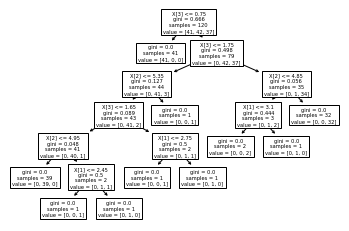

In [3]:
# 用这个画太糙了
plot_tree(dt_cls)

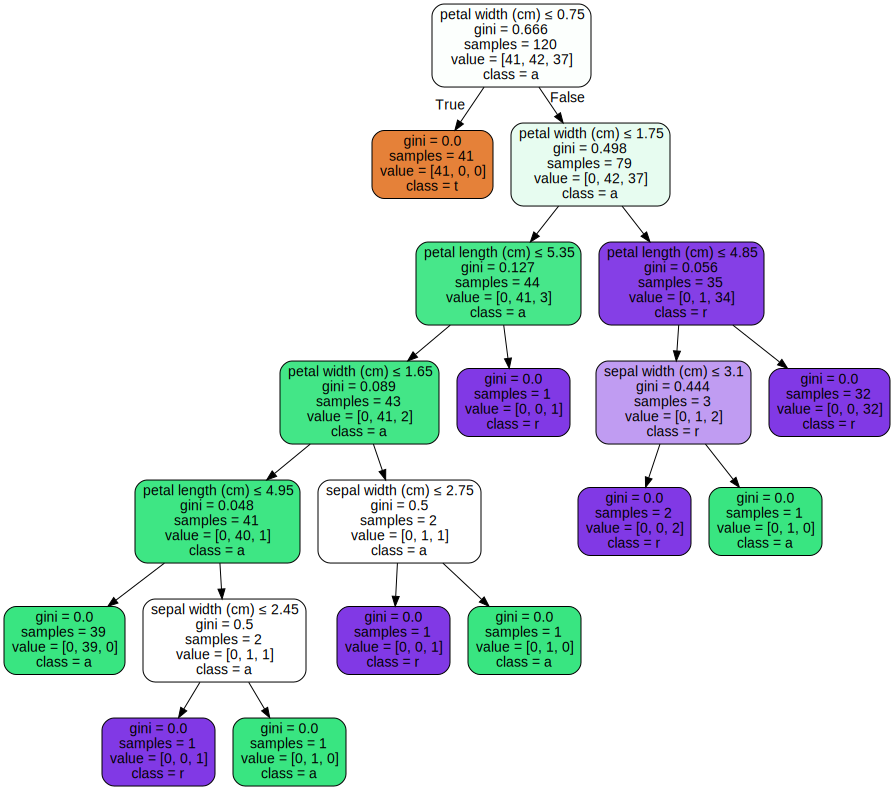

In [4]:
import graphviz 
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dt_cls, out_file=None, 
                     feature_names=X_cls_train.columns,  
                     class_names=y_cls_train.columns[0],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 